In [5]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (5, 5)

import sys
sys.path.append('../code/')
from model_vectorised import *

In [25]:
%%time
model = VecModel(0.1) #dt=0.1
model.read('../model//toth_szalai_modified.txt')
model.simulate(1200) #simulate for 600 

CPU times: user 6.66 s, sys: 761 ms, total: 7.42 s
Wall time: 7.47 s


Simple arrestin binding

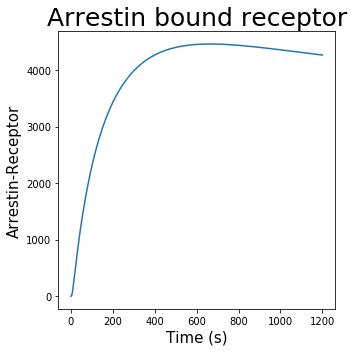

In [8]:
molecules_dict = {'Arrestin-Receptor' : [10, 11, 12, 13, 14, 15]}
plt.figure(1)
model.plot(molecules_dict['Arrestin-Receptor'])
plt.xlabel('Time (s)', size=15)
plt.ylabel('Arrestin-Receptor', size=15)
plt.title('Arrestin bound receptor', size=25)
plt.tight_layout()

Arrestin dose response

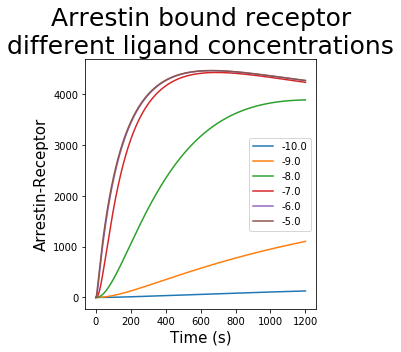

In [10]:
molecules_dict['Ligand'] = [1, 3] #ligand cc in uM, from Figure 1
ligands = 10**np.arange(-4, 1.5, 1) #from 100 pM to 10 uM
for ligand in ligands:
    model=VecModel(0.1)
    model.read('../model/toth_szalai_modified.txt')
    model.change_ccs(molecules_dict['Ligand'], ligand)
    model.simulate(1200)
    model.plot(molecules_dict['Arrestin-Receptor'])
plt.legend(np.log10(ligands)-6) #concentration in M 
plt.xlabel('Time (s)', size=15)
plt.ylabel('Arrestin-Receptor', size=15)
plt.title('Arrestin bound receptor\ndifferent ligand concentrations', size=25)
plt.tight_layout()

Low kon

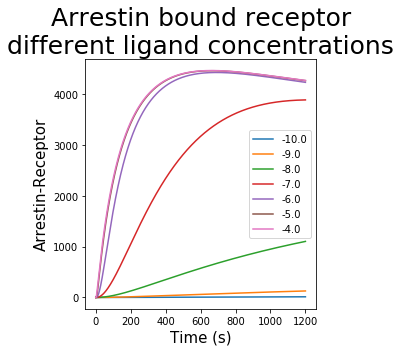

In [11]:

constant_dict = {'Receptor-Ligand kon' : [1, 5, 9, 13, 17, 21, 51, 55]}

ligands = 10**np.arange(-4, 2.5, 1) #from 100 pM to 10 uM
for ligand in ligands:
    model=VecModel(0.1)
    model.read('../model/toth_szalai_modified.txt')
    model.change_constant(constant_dict['Receptor-Ligand kon'], 0.03)
    model.change_ccs(molecules_dict['Ligand'], ligand)
    model.simulate(1200)
    model.plot(molecules_dict['Arrestin-Receptor'])
plt.legend(np.log10(ligands)-6) #concentration in M 
plt.xlabel('Time (s)', size=15)
plt.ylabel('Arrestin-Receptor', size=15)
plt.title('Arrestin bound receptor\ndifferent ligand concentrations', size=25)
plt.tight_layout()

High koff

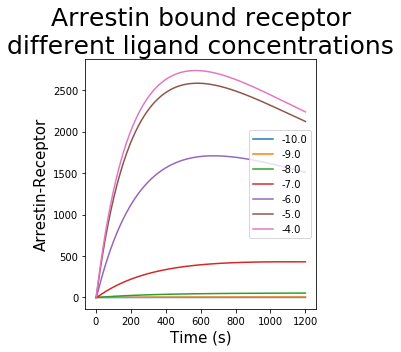

In [13]:
constant_dict['Receptor-Ligand koff'] = [2, 6, 10, 14, 18, 22, 4, 8, 12, 16, 20, 24, 52, 56, 54, 58]
#constant_dict['arrestin-kon-active'] = [35, 44]
#constant_dict['arrestin-kon-inactive'] = [36, 37, 45, 46]
#constant_dict['arrestin-koff-active'] = [34, 43]
#constant_dict['arrestin-koff-inactive'] = [32, 33, 41, 42]
ligands = 10**np.arange(-4, 2.5, 1) #from 100 pM to 10 uM
for ligand in ligands:
    model=VecModel(0.1)
    model.read('../model/toth_szalai_modified.txt')
    model.change_constant(constant_dict['Receptor-Ligand koff'], 0.3)
    
    model.change_ccs(molecules_dict['Ligand'], ligand)
    model.simulate(1200)
    model.plot(molecules_dict['Arrestin-Receptor'])
plt.legend(np.log10(ligands)-6) #concentration in M 
plt.xlabel('Time (s)', size=15)
plt.ylabel('Arrestin-Receptor', size=15)
plt.title('Arrestin bound receptor\ndifferent ligand concentrations', size=25)
plt.tight_layout()

No internal

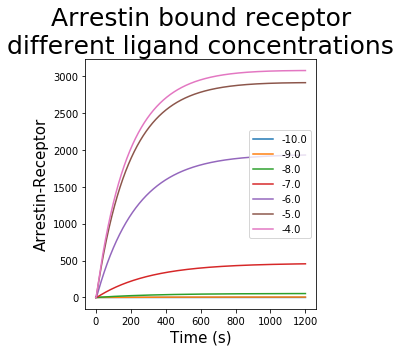

In [14]:
constant_dict['internal'] = [38, 39, 40]
for ligand in ligands:
    model=VecModel(0.1)
    model.read('../model/toth_szalai_modified.txt')
    model.change_constant(constant_dict['Receptor-Ligand koff'], 0.3)
    model.change_constant(constant_dict['internal'], 0.0037*0.01)
    model.change_ccs(molecules_dict['Ligand'], ligand)
    model.simulate(1200)
    model.plot(molecules_dict['Arrestin-Receptor'])
plt.legend(np.log10(ligands)-6) #concentration in M 
plt.xlabel('Time (s)', size=15)
plt.ylabel('Arrestin-Receptor', size=15)
plt.title('Arrestin bound receptor\ndifferent ligand concentrations', size=25)
plt.tight_layout()

Phosphorilation everywhere

In [132]:
constant_dict['phospho PM'] = [30]
constant_dict['phospho IC'] = [50]

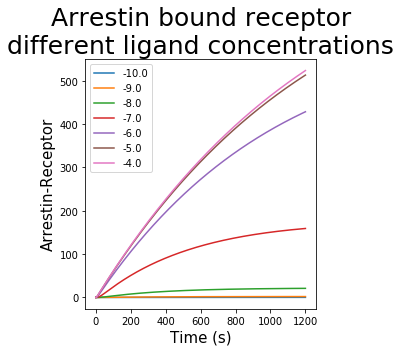

In [136]:
for ligand in ligands:
    model=VecModel(0.1)
    model.read('../models/toth_szalai_modified.txt')
    model.change_constant(constant_dict['Receptor-Ligand koff'], 0.03)
    model.change_constant(constant_dict['phospho PM'], 0.02)
    model.change_constant(constant_dict['phospho IC'], 0.002)
    model.change_ccs(molecules_dict['Ligand'], ligand)
    model.simulate(1200)
    model.plot(molecules_dict['Arrestin-Receptor'])
plt.legend(np.log10(ligands)-6) #concentration in M 
plt.xlabel('Time (s)', size=15)
plt.ylabel('Arrestin-Receptor', size=15)
plt.title('Arrestin bound receptor\ndifferent ligand concentrations', size=25)
plt.tight_layout()

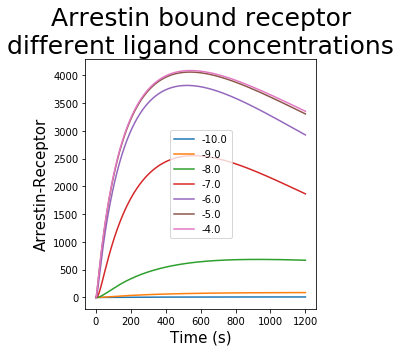

In [137]:
for ligand in ligands:
    model=VecModel(0.1)
    model.read('../models/toth_szalai_modified.txt')
    model.change_constant(constant_dict['Receptor-Ligand koff'], 0.03)
    #model.change_constant(constant_dict['phospho PM'], 0.02)
    model.change_constant(constant_dict['phospho IC'], 0.002)
    model.change_ccs(molecules_dict['Ligand'], ligand)
    model.simulate(1200)
    model.plot(molecules_dict['Arrestin-Receptor'])
plt.legend(np.log10(ligands)-6) #concentration in M 
plt.xlabel('Time (s)', size=15)
plt.ylabel('Arrestin-Receptor', size=15)
plt.title('Arrestin bound receptor\ndifferent ligand concentrations', size=25)
plt.tight_layout()

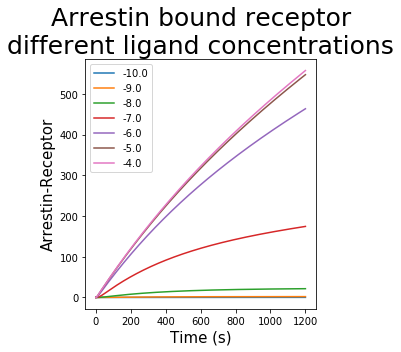

In [138]:
for ligand in ligands:
    model=VecModel(0.1)
    model.read('../models/toth_szalai_modified.txt')
    model.change_constant(constant_dict['Receptor-Ligand koff'], 0.03)
    model.change_constant(constant_dict['phospho PM'], 0.02)
    #model.change_constant(constant_dict['phospho IC'], 0.002)
    model.change_ccs(molecules_dict['Ligand'], ligand)
    model.simulate(1200)
    model.plot(molecules_dict['Arrestin-Receptor'])
plt.legend(np.log10(ligands)-6) #concentration in M 
plt.xlabel('Time (s)', size=15)
plt.ylabel('Arrestin-Receptor', size=15)
plt.title('Arrestin bound receptor\ndifferent ligand concentrations', size=25)
plt.tight_layout()

Phosphatase everywhere

In [140]:
constant_dict['phosphatase PM'] = [25, 27, 29]
constant_dict['phosphoatase IC'] = [47, 48, 49]

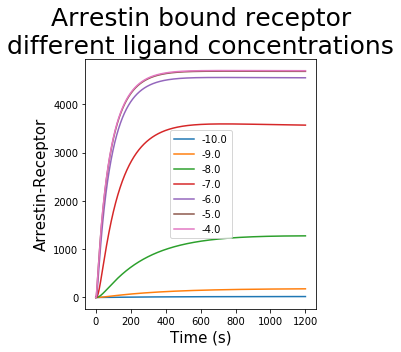

In [141]:
for ligand in ligands:
    model=VecModel(0.1)
    model.read('../models/toth_szalai_modified.txt')
    model.change_constant(constant_dict['Receptor-Ligand koff'], 0.03)
    model.change_constant(constant_dict['phosphatase PM'], 0.02)
    model.change_constant(constant_dict['phosphoatase IC'], 0.02)
    model.change_ccs(molecules_dict['Ligand'], ligand)
    model.simulate(1200)
    model.plot(molecules_dict['Arrestin-Receptor'])
plt.legend(np.log10(ligands)-6) #concentration in M 
plt.xlabel('Time (s)', size=15)
plt.ylabel('Arrestin-Receptor', size=15)
plt.title('Arrestin bound receptor\ndifferent ligand concentrations', size=25)
plt.tight_layout()

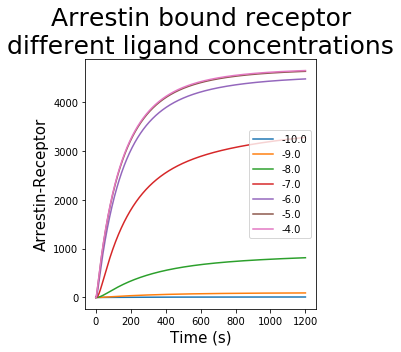

In [142]:
for ligand in ligands:
    model=VecModel(0.1)
    model.read('../models/toth_szalai_modified.txt')
    model.change_constant(constant_dict['Receptor-Ligand koff'], 0.03)
    #model.change_constant(constant_dict['phosphatase PM'], 0.02)
    model.change_constant(constant_dict['phosphoatase IC'], 0.02)
    model.change_ccs(molecules_dict['Ligand'], ligand)
    model.simulate(1200)
    model.plot(molecules_dict['Arrestin-Receptor'])
plt.legend(np.log10(ligands)-6) #concentration in M 
plt.xlabel('Time (s)', size=15)
plt.ylabel('Arrestin-Receptor', size=15)
plt.title('Arrestin bound receptor\ndifferent ligand concentrations', size=25)
plt.tight_layout()

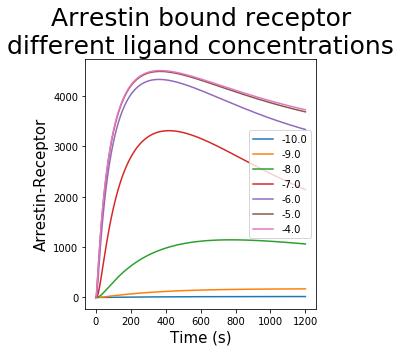

In [143]:
for ligand in ligands:
    model=VecModel(0.1)
    model.read('../models/toth_szalai_modified.txt')
    model.change_constant(constant_dict['Receptor-Ligand koff'], 0.03)
    model.change_constant(constant_dict['phosphatase PM'], 0.02)
    #model.change_constant(constant_dict['phosphoatase IC'], 0.02)
    model.change_ccs(molecules_dict['Ligand'], ligand)
    model.simulate(1200)
    model.plot(molecules_dict['Arrestin-Receptor'])
plt.legend(np.log10(ligands)-6) #concentration in M 
plt.xlabel('Time (s)', size=15)
plt.ylabel('Arrestin-Receptor', size=15)
plt.title('Arrestin bound receptor\ndifferent ligand concentrations', size=25)
plt.tight_layout()

Arrestin association

In [144]:
constant_dict['arrestin on fast'] = [35, 44]
constant_dict['arrestin on slow'] = [36, 37, 45, 46]

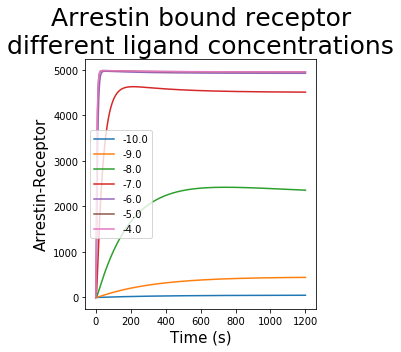

In [145]:
for ligand in ligands:
    model=VecModel(0.1)
    model.read('../models/toth_szalai_modified.txt')
    model.change_constant(constant_dict['Receptor-Ligand koff'], 0.03)
    model.change_constant(constant_dict['arrestin on fast'], 0.0001)
    model.change_constant(constant_dict['arrestin on slow'], 0.00001)
    model.change_ccs(molecules_dict['Ligand'], ligand)
    model.simulate(1200)
    model.plot(molecules_dict['Arrestin-Receptor'])
plt.legend(np.log10(ligands)-6) #concentration in M 
plt.xlabel('Time (s)', size=15)
plt.ylabel('Arrestin-Receptor', size=15)
plt.title('Arrestin bound receptor\ndifferent ligand concentrations', size=25)
plt.tight_layout()

### arrestin dissociation

In [146]:
constant_dict['arrestin off fast'] = [33, 32, 42, 41]
constant_dict['arrestin off slow'] = [34,43]

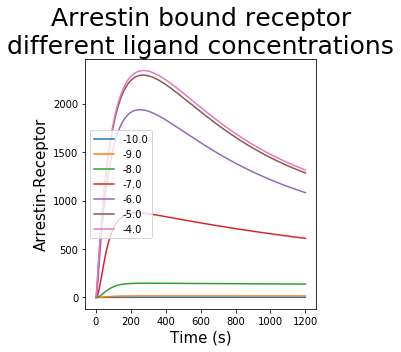

In [147]:
for ligand in ligands:
    model=VecModel(0.1)
    model.read('../models/toth_szalai_modified.txt')
    model.change_constant(constant_dict['Receptor-Ligand koff'], 0.03)
    model.change_constant(constant_dict['arrestin off fast'], 0.03)
    model.change_constant(constant_dict['arrestin off slow'], 0.003)
    model.change_ccs(molecules_dict['Ligand'], ligand)
    model.simulate(1200)
    model.plot(molecules_dict['Arrestin-Receptor'])
plt.legend(np.log10(ligands)-6) #concentration in M 
plt.xlabel('Time (s)', size=15)
plt.ylabel('Arrestin-Receptor', size=15)
plt.title('Arrestin bound receptor\ndifferent ligand concentrations', size=25)
plt.tight_layout()

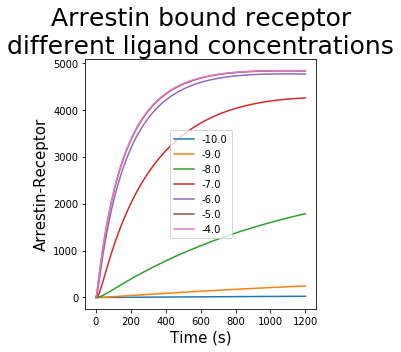

In [148]:
for ligand in ligands:
    model=VecModel(0.1)
    model.read('../models/toth_szalai_modified.txt')
    model.change_constant(constant_dict['Receptor-Ligand koff'], 0.03)
    model.change_constant(constant_dict['arrestin off fast'], 0.0003)
    model.change_constant(constant_dict['arrestin off slow'], 0.00003)
    model.change_ccs(molecules_dict['Ligand'], ligand)
    model.simulate(1200)
    model.plot(molecules_dict['Arrestin-Receptor'])
plt.legend(np.log10(ligands)-6) #concentration in M 
plt.xlabel('Time (s)', size=15)
plt.ylabel('Arrestin-Receptor', size=15)
plt.title('Arrestin bound receptor\ndifferent ligand concentrations', size=25)
plt.tight_layout()

Ligand

In [16]:
molecules_dict['Ligand EC'] = [1]
molecules_dict['Ligand IC'] = [3]

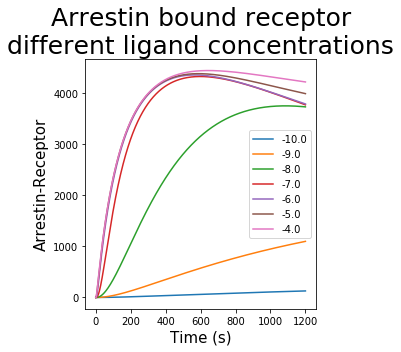

In [21]:
for ligand in ligands:
    model=VecModel(0.1)
    model.read('../model/toth_szalai_modified.txt')
    model.change_constant(constant_dict['Receptor-Ligand koff'], 0.0003)
    model.change_ccs(molecules_dict['Ligand EC'], ligand)
    model.change_ccs(molecules_dict['Ligand IC'], ligand*0.001)
    model.simulate(1200)
    model.plot(molecules_dict['Arrestin-Receptor'])
plt.legend(np.log10(ligands)-6) #concentration in M 
plt.xlabel('Time (s)', size=15)
plt.ylabel('Arrestin-Receptor', size=15)
plt.title('Arrestin bound receptor\ndifferent ligand concentrations', size=25)
plt.tight_layout()

Ligand koff EC IC

In [15]:
constant_dict['Receptor-Ligand koff EC'] = [2, 6, 10, 4, 8, 12, 52, 56, 54, 58]
constant_dict['Receptor-Ligand koff IC'] = [14, 18, 22, 16, 20, 24]

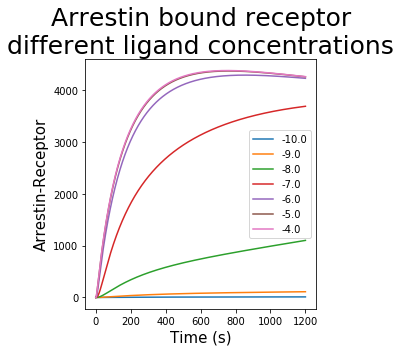

In [153]:
for ligand in ligands:
    model=VecModel(0.1)
    model.read('../models/toth_szalai_modified.txt')
    model.change_constant(constant_dict['Receptor-Ligand koff EC'], 0.03)
    model.change_ccs(molecules_dict['Ligand'], ligand)
    model.simulate(1200)
    model.plot(molecules_dict['Arrestin-Receptor'])
plt.legend(np.log10(ligands)-6) #concentration in M 
plt.xlabel('Time (s)', size=15)
plt.ylabel('Arrestin-Receptor', size=15)
plt.title('Arrestin bound receptor\ndifferent ligand concentrations', size=25)
plt.tight_layout()

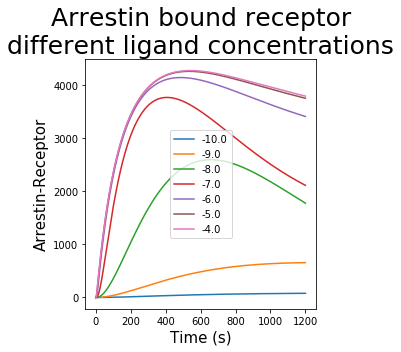

In [154]:
for ligand in ligands:
    model=VecModel(0.1)
    model.read('../models/toth_szalai_modified.txt')
    model.change_constant(constant_dict['Receptor-Ligand koff IC'], 0.03)
    model.change_ccs(molecules_dict['Ligand'], ligand)
    model.simulate(1200)
    model.plot(molecules_dict['Arrestin-Receptor'])
plt.legend(np.log10(ligands)-6) #concentration in M 
plt.xlabel('Time (s)', size=15)
plt.ylabel('Arrestin-Receptor', size=15)
plt.title('Arrestin bound receptor\ndifferent ligand concentrations', size=25)
plt.tight_layout()